### Imports

In [1]:
## Libraries
import os  # when loading file paths
import pandas as pd  # for lookup in annotation file
import spacy  # for tokenizer
import torch

from PIL import Image  # Load img
import torch
import torch.nn as nn
import statistics
from torch.utils.data import DataLoader, Dataset
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Python Files
import utils
import datas
import models

### Setting up GPU Device

In [2]:
# Setting device on GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

torch.backends.cudnn.deterministic = True

Using device: cpu



### Convert .mat to .png images for memory managment during training

In [3]:
# path2dataset = "nyu_depth_v2_labeled.mat"
# utils.mat2png(path2dataset)

### Load datas

In [4]:
root_folder = 'Datas'

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_loader, test_loader = datas.get_loader(root_folder, batch_size=32, num_datas=1449, train_test_ratio=0.9, transform=transform)

torch.Size([32, 3, 640, 640]) torch.Size([32, 3, 640, 640]) torch.Size([32, 3, 640, 640])


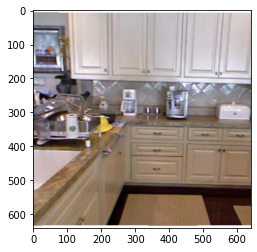

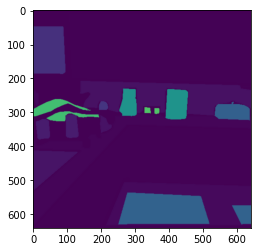

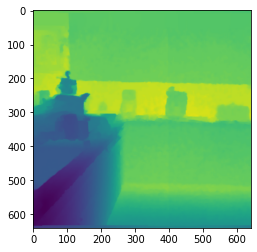

In [5]:
from torchvision.transforms.functional import convert_image_dtype
for indx, (images, depths, labels) in enumerate(train_loader):
    print(images.shape, depths.shape, labels.shape)
    plt.imshow(images[0].permute(1,2,0))
    plt.figure()
    plt.imshow(depths[0].permute(1,2,0))
    plt.figure()
    plt.imshow(labels[0].permute(1,2,0))
    break

### Training

In [6]:
learning_rate = 0.01

object_detector = models.ObjectDetector().to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.Adam(object_detector.parameters(), lr = learning_rate)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0667182058095932


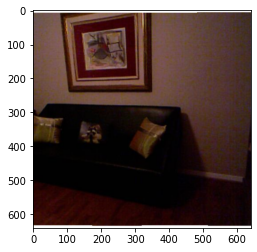

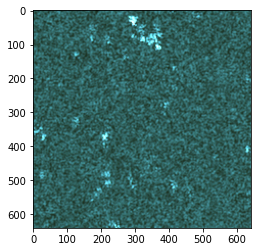

0.054189179092645645


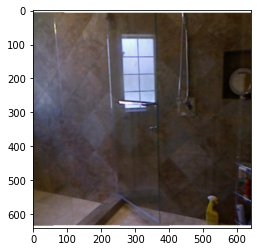

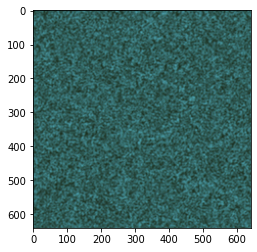

0.049030106514692307


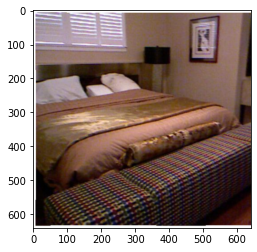

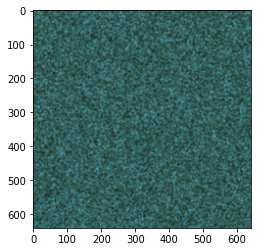

0.05386197566986084


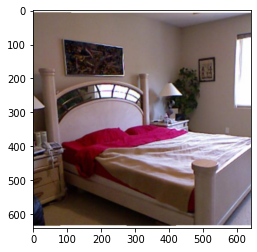

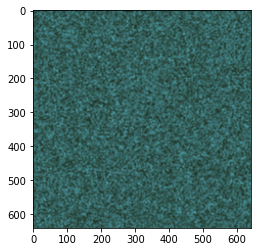

0.047109708189964294


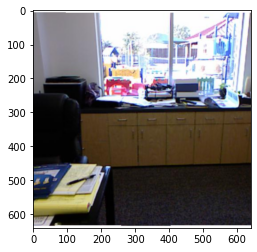

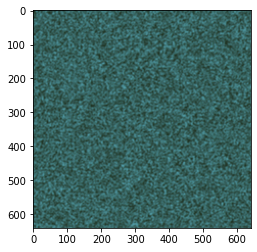

0.04544017091393471


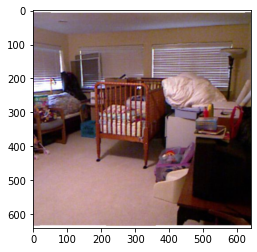

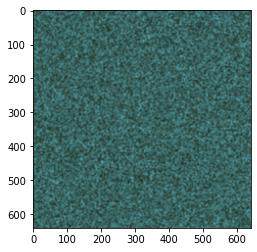

In [ ]:
from torchvision.utils import draw_bounding_boxes

for indx, (images, depths, labels) in enumerate(train_loader):
    inp_images = images.to(device)
    out_labels = object_detector(inp_images)
    
    loss = criterion(labels, out_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss.item())
    plt.figure()
    plt.imshow(inp_images[0].permute(1,2,0))
    plt.figure()
    plt.imshow(out_labels[0].permute(1,2,0).detach().numpy())
    plt.show()
    